In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import rainflow
import scipy
import scipy.signal

In [2]:
# Read from file
with open('data.txt') as f:
    data = f.read().split('\n')
    data = pd.DataFrame([[float(y) for y in x.split(' ') if len(y)] for x in data])

In [3]:
# Save to dataframe
datasets = []
datasets.append(data.loc[:, 0:1].set_index([0]))
datasets.append(data.loc[:, 2:3].rename(columns={2: 0, 3: 1}).set_index([0]))
datasets.append(data.loc[:, 4:5].rename(columns={4: 0, 5: 1}).set_index([0]))
datasets.append(data.loc[:, 6:7].rename(columns={6: 0, 7: 1}).set_index([0]))

In [4]:
# Reduce noise
# Parameter and algorithm choice by clueless experimentation
for i in range(0, 4):
    datasets[i][2] = scipy.signal.savgol_filter(datasets[i].loc[:,1], 41, 5)

In [5]:
# Rainflow penalty function
def rainflow_penalty(data):
    return np.sum([(high-low)*mult for low, high, mult in rainflow.extract_cycles(data, right=True)])


In [17]:
cycles = [(high, ((high-low)*mult)) for low, high, mult in rainflow.extract_cycles(datasets[0].loc[:,2])]

In [18]:
datasets[0].loc[:, 3] = datasets[0].loc[:,2].map(dict(cycles)).interpolate('pad')

<IPython.core.display.Javascript object>


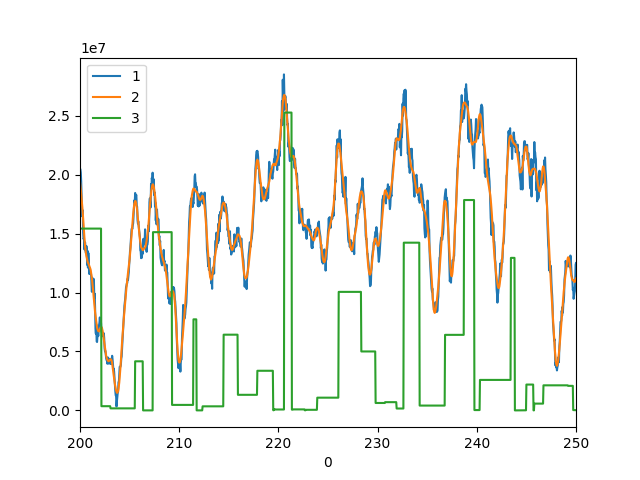

In [21]:
datasets[0].loc[200:250].plot()